In [ ]:
import numpy as np

# setting the seed allows for reproducible results
np.random.seed(123)

import tensorflow as tf
from tensorflow.keras.layers import LSTM, Flatten, Dense
from tensorflow.keras.models import Sequential
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam

import pandas as pd
import matplotlib.pyplot as plt
import math
tf.experimental.numpy.experimental_enable_numpy_behavior()

In [ ]:
class Model:
    def __init__(self):
        self.data = None
        self.model = None
        self.final_ratio = None
        self.cov = None
        self.exp_return = None

    def sharpe_loss(self, y_true, y_pred):

        a = self.exp_return.reshape(1, -1) @ y_pred.reshape(-1, 1)
        b = self.cov @ y_pred.reshape(-1, 1)
        c = y_pred.reshape(1, -1) @ b.reshape(-1, 1)
        d = tf.math.sqrt(c)

        sharpe = a / d
        return -sharpe

    def __build_model(self, input_shape, outputs, l_rate):

        model = Sequential([
            LSTM(64, input_shape=input_shape),
            Flatten(),
            Dense(outputs, activation='softmax')
        ])

        Opt = Adam(learning_rate = l_rate)
        model.compile(loss=self.sharpe_loss, optimizer=Opt)
        return model

    def get_allocations(self, data: pd.DataFrame, lr=0.001, ep=20):

        data_w_ret = np.concatenate([ data.values[1:], data.pct_change().values[1:] ], axis=1)

        temparr = data.to_numpy()
        return_rate = (temparr[:-1] - temparr[1:])/temparr[1:]
        exp_return = np.mean(return_rate,axis=0)
        cov = np.transpose(return_rate) @ return_rate
        cov = cov/(len(data.index)-1)

        data = data.iloc[1:]

        self.data = tf.cast(tf.constant(data), float)
        self.exp_return = tf.convert_to_tensor(exp_return, tf.float32)
        self.cov = tf.convert_to_tensor(cov, tf.float32)

        if self.model is None:
            self.model = self.__build_model(data_w_ret.shape, len(data.columns), l_rate = lr)

        fit_predict_data = data_w_ret[np.newaxis,:]
        history = self.model.fit(fit_predict_data, np.zeros((1, len(data.columns))), epochs=ep, shuffle=False)
        self.final_ratio = -history.history['loss'][-1]
        return self.model.predict(fit_predict_data)[0]

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/OMF_data_final/uploaded_data_2/Dataset_2_csv.csv')
df = df[df.columns[1:]]

10 Epochs

In [ ]:
num_epochs = 10 #change to required number of epochs

In [ ]:
test_learning_rate = []
test_sharpe_ratio = []

In [ ]:
test_rate = 1e-6
while (test_rate <= 100):
  m = Model()
  m.get_allocations(df,test_rate,num_epochs)
  test_learning_rate.append(test_rate)
  test_sharpe_ratio.append(m.final_ratio)
  test_rate *= 10

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: -0.0556
Epoch 2/10
1/1 [==============================] - 0s 127ms/step - loss: -0.0556
Epoch 3/10
1/1 [==============================] - 0s 128ms/step - loss: -0.0556
Epoch 4/10
1/1 [==============================] - 0s 137ms/step - loss: -0.0556
Epoch 5/10
1/1 [==============================] - 0s 126ms/step - loss: -0.0556
Epoch 6/10
1/1 [==============================] - 0s 141ms/step - loss: -0.0556
Epoch 7/10
1/1 [==============================] - 0s 127ms/step - loss: -0.0557
Epoch 8/10
1/1 [==============================] - 0s 162ms/step - loss: -0.0557
Epoch 9/10
1/1 [==============================] - 0s 138ms/step - loss: -0.0557
Epoch 10/10
1/1 [==============================] - 1s 562ms/step
Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: -0.0643
Epoch 2/10
1/1 [==============================] - 0s 188ms/step - loss: -0.0643
Epoch 3/10
1/1 [==============================] - 0s 194ms/st

In [ ]:
Table_1 = pd.DataFrame({'Learning Rate': test_learning_rate, 'Sharpe Ratio': test_sharpe_ratio})
Table_1

,Learning Rate,Sharpe Ratio
0,0.000001,0.055729
1,0.000010,0.064422
2,0.000100,0.041445
3,0.001000,0.075315
4,0.010000,0.141785
5,0.100000,0.189408
6,1.000000,0.119262
7,10.000000,0.117538
8,100.000000,0.117537


In [ ]:
test_learning_rate = []
test_sharpe_ratio = []

In [ ]:
test_rate = 0.001
while (test_rate <= 1):
  m = Model()
  m.get_allocations(df,test_rate,num_epochs)
  test_learning_rate.append(test_rate)
  test_sharpe_ratio.append(m.final_ratio)
  test_rate += 0.003

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: -0.0613
Epoch 2/10
1/1 [==============================] - 0s 173ms/step - loss: -0.0623
Epoch 3/10
1/1 [==============================] - 0s 169ms/step - loss: -0.0631
Epoch 4/10
1/1 [==============================] - 0s 174ms/step - loss: -0.0640
Epoch 5/10
1/1 [==============================] - 0s 165ms/step - loss: -0.0650
Epoch 6/10
1/1 [==============================] - 0s 168ms/step - loss: -0.0659
Epoch 7/10
1/1 [==============================] - 0s 170ms/step - loss: -0.0668
Epoch 8/10
1/1 [==============================] - 0s 173ms/step - loss: -0.0677
Epoch 9/10
1/1 [==============================] - 0s 167ms/step - loss: -0.0686
Epoch 10/10
1/1 [==============================] - 1s 644ms/step
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: -0.0542
Epoch 2/10
1/1 [==============================] - 0s 120ms/step - loss: -0.0593
Epoch 3/10
1/1 [==============================] - 0s 111ms/st

1/1 [==============================] - 0s 454ms/step
Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: -0.0560
Epoch 2/10
1/1 [==============================] - 0s 200ms/step - loss: -0.0713
Epoch 3/10
1/1 [==============================] - 0s 181ms/step - loss: -0.0865
Epoch 4/10
1/1 [==============================] - 0s 169ms/step - loss: -0.1010
Epoch 5/10
1/1 [==============================] - 0s 172ms/step - loss: -0.1140
Epoch 6/10
1/1 [==============================] - 0s 171ms/step - loss: -0.1253
Epoch 7/10
1/1 [==============================] - 0s 165ms/step - loss: -0.1353
Epoch 8/10
1/1 [==============================] - 0s 170ms/step - loss: -0.1445
Epoch 9/10
1/1 [==============================] - 0s 143ms/step - loss: -0.1530
Epoch 10/10
1/1 [==============================] - 0s 104ms/step - loss: -0.1610


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 1s 655ms/step
Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: -0.0557
Epoch 2/10
1/1 [==============================] - 0s 106ms/step - loss: -0.1278
Epoch 3/10
1/1 [==============================] - 0s 117ms/step - loss: -0.1781
Epoch 4/10
1/1 [==============================] - 0s 117ms/step - loss: -0.1835
Epoch 5/10
1/1 [==============================] - 0s 107ms/step - loss: -0.1772
Epoch 6/10
1/1 [==============================] - 0s 112ms/step - loss: -0.1456
Epoch 7/10
1/1 [==============================] - 0s 109ms/step - loss: -0.1130
Epoch 8/10
1/1 [==============================] - 0s 111ms/step - loss: -0.1128
Epoch 9/10
1/1 [==============================] - 0s 113ms/step - loss: -0.1239
Epoch 10/10
1/1 [==============================] - 0s 420ms/step
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: -0.0701
Epoch 2/10
1/1 [=====================

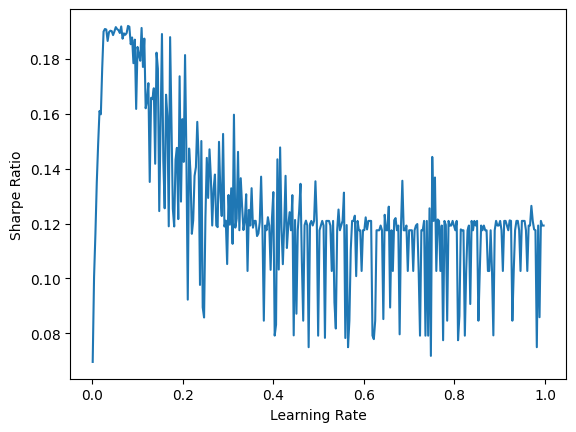

In [ ]:
plt.plot(test_learning_rate,test_sharpe_ratio)
plt.xlabel('Learning Rate')
plt.ylabel('Sharpe Ratio')
plt.show()